<a href="https://colab.research.google.com/github/chrisdionisius/MachineLearning2022/blob/main/Jobsheet02_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727008
Nama: Dionisius Damarta Yapenrui
Kelas: TI-4J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

In [45]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [46]:
# import package
import numpy as np
import pandas as pd

In [47]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv')
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
2,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
3,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
4,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762


In [48]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   830 non-null    object 
 1   Released_Year  830 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        830 non-null    int64  
 4   Genre          830 non-null    object 
 5   IMDB_Rating    830 non-null    float64
 6   Overview       830 non-null    object 
 7   Meta_score     750 non-null    float64
 8   Director       830 non-null    object 
 9   Star1          830 non-null    object 
 10  Star2          830 non-null    object 
 11  Star3          830 non-null    object 
 12  Star4          830 non-null    object 
 13  No_of_Votes    830 non-null    int64  
 14  Gross          830 non-null    int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 97.4+ KB


,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,830.000000,830.000000,750.000000,8.300000e+02,8.300000e+02
mean,124.106024,7.947229,77.460000,3.155919e+05,6.810724e+07
std,27.506347,0.283245,12.493967,3.437100e+05,1.097966e+08
min,45.000000,7.600000,28.000000,2.508800e+04,3.600000e+01
25%,104.000000,7.700000,70.000000,7.157950e+04,3.280878e+06
50%,120.000000,7.900000,78.000000,1.871505e+05,2.358408e+07
75%,138.000000,8.100000,86.000000,4.465445e+05,8.087634e+07
max,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### Visualisasi Data

In [49]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


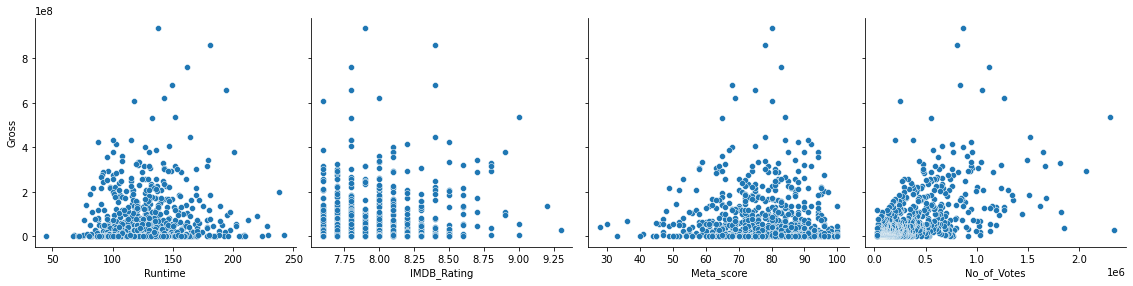

In [50]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Runtime','IMDB_Rating','Meta_score','No_of_Votes'], 
             y_vars='Gross', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

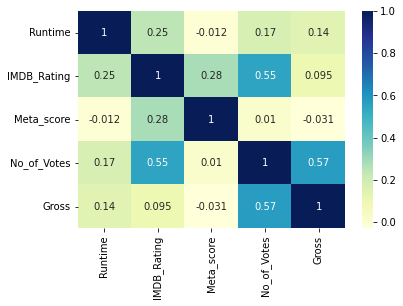

In [51]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [36]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['No_of_Votes']
y = data['Gross']

In [37]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [38]:
# hasil training dtaset
X_train
y_train

310      1105564
248    190241310
44      23341568
676     12535000
423     22245861
         ...    
53       2832029
350     10824921
79     381011219
792       128985
520     78912963
Name: Gross, Length: 581, dtype: int64

In [39]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const          1.196230e+07
No_of_Votes    1.764839e+02
dtype: float64

In [41]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gross   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     257.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.90e-48
Time:                        08:48:11   Log-Likelihood:                -11495.
No. Observations:                 581   AIC:                         2.299e+04
Df Residuals:                     579   BIC:                         2.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.196e+07   5.26e+06      2.273      0.023    1.63e+06    2.23e+07
No_of_Votes   176.4839     10.990     16.058      0.000     154.898     198.070
==============================================================================
Omnibus:                      441.204   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9819.983
Skew:                           3.132   Prob(JB):                         0.00
Kurtosis:                      22.142   Cond. No.                     6.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

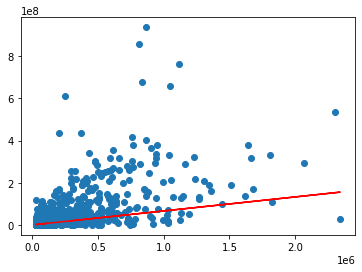

In [42]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [43]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


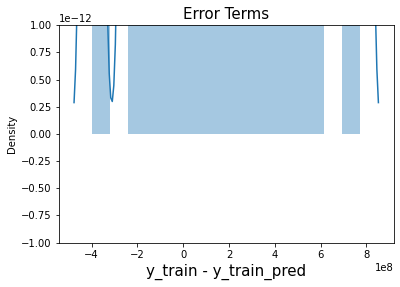

In [44]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

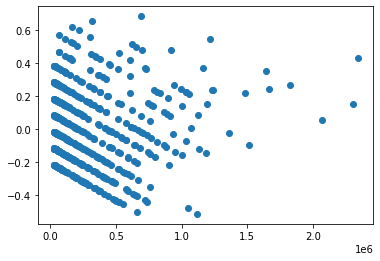

In [24]:
plt.scatter(X_train,res)
plt.show()

In [25]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


97     8.054654
500    8.134633
726    7.858333
48     7.898713
691    7.948696
dtype: float64

In [26]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.3245407394101507

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

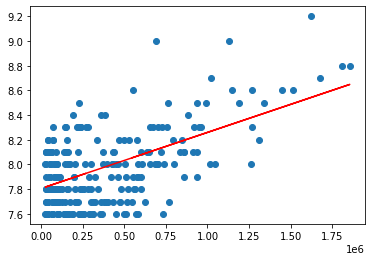

In [27]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()